# Exercise 5.03: Implementing the Mean Shift Algorithm

In this exercise, we will implement clustering by using the mean shift algorithm.

We will use the `scipy.spatial` library in order to compute the Euclidean distance. This library simplifies the calculation of distances (such as Euclidean or Manhattan) between a list of coordinates. More details about this library can be found at [https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance).

The following steps will help you complete the exercise:

1.- Let's use the data points from Exercise 5.01.

Output

![Figure 5.8](img/fig5_08.jpg)

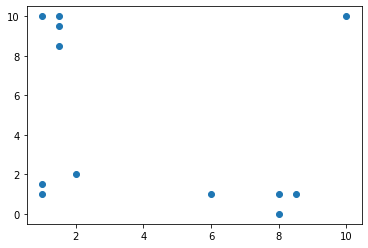

In [25]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plot

data_points = np.array([[1, 1], [1, 1.5], [2, 2], [8, 1],
                        [8, 0], [8.5, 1], [6, 1], [1, 10],
                        [1.5, 10], [1.5, 9.5], [10, 10], [1.5, 8.5]])
plot.scatter(data_points.transpose()[0], data_points.transpose()[1])

2.- Equate point P1 to the first data point, `[1, 1]` of our list

In [26]:
P1=[1,1]

3.- Find the points that are within a distance of `r = 2` from this point. We will use the `scipy` library, which simplifies mathematical calculations, including spatial distance.

Output:

```
array([[1. , 1. ],
       [1. , 1.5],
       [2. , 2. ]])
```

In [27]:
r = 2
puntos1 = np.array([p0 for p0 in data_points if distance.euclidean(p0, P1) <= r])

puntos1

array([[1. , 1. ],
       [1. , 1.5],
       [2. , 2. ]])

From the output, we can see that we found three points that fall within the radius of P1. They are the three points at the bottom left of the graph we saw earlier

4.- Calculate the mean of the data points to obtain the new coordinates of P2.

Output:

```
[1.3333333333333333, 1.5]
```

In [28]:
P2 = [np.mean( puntos1.transpose()[0] ), np.mean(puntos1.transpose()[1] )]

P2

[1.3333333333333333, 1.5]

5.- Now that the new P2 has been calculated, retrieve the points within the given radius again.

Output:
    
```
array([[1. , 1. ],
       [1. , 1.5],
       [2. , 2. ]])
```

In [29]:
puntos2 = np.array([p0 for p0 in data_points if distance.euclidean( p0, P2) <= r])

puntos2

array([[1. , 1. ],
       [1. , 1.5],
       [2. , 2. ]])

These are the same three points that we found in Step 3, so we can stop here. Three points have been found around the mean of $[1.3333333333333333, 1.5]$. The points around this center within a radius of 2 form a cluster.

6.- Since data points $[1, 1.5]$ and $[2, 2]$ are already in a cluster with $[1,1]$, we can directly continue with the fourth point in our list, $[8, 1]$.

Output:

```
array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ],
       [6. , 1. ]])
```

In [30]:
P3 = [8, 1]

puntos3 = np.array([p0 for p0 in data_points if distance.euclidean(p0, P3) <= r])

puntos3

array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ],
       [6. , 1. ]])

This time, we found four points inside the radius r of P3

7.- Calculate means and asign to P4.

Output:

```
[7.625, 0.75]
```

In [31]:
P4 = [np.mean(puntos3.transpose()[0]), np.mean(puntos3.transpose()[1])]

P4

[7.625, 0.75]

We calculated the mean of the array containing the four data points in order to obtain the new coordinates of P4.

8.- Notice that we got lucky with the selection of point $[8, 1]$. If we started with $P = [8, 0]$ or $P = [8.5, 1]$, we would only find three points instead of four. Let's try with $P5 = [8, 0]$.

Output:

```
array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ]])
```

In [32]:
P5 = [8, 0]

puntos4 = np.array([p0 for p0 in data_points if distance.euclidean(p0, P5) <= r])

puntos4

array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ]])

This time, we found three points inside the radius r of P5.

9.- Now, rerun the distance calculation with the shifted mean as shown in Step 4.

Output:

```
[8.166666666666666, 0.6666666666666666]
```

In [33]:
P6 = [np.mean(puntos4.transpose()[0]), np.mean(puntos4.transpose()[1])]

P6

[8.166666666666666, 0.6666666666666666]

10.- Now do the same again but with `P7 = [8.5, 1]`

Output:

```
array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ]])
```

In [34]:
P7 = [8.5, 1]

puntos5 = np.array([p0 for p0 in data_points if distance.euclidean(p0, P7) <= r])

puntos5

array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ]])

This time, we found the same three points again inside the radius r of P. This means that starting from $[8,1]$, we got a larger cluster than starting from $[8, 0]$ or $[8.5, 1]$. Therefore, we must take the center point that contains the maximum number of data points.

11.- Now, let's see what would happen if we started the discovery from the fourth data point, that is, $[6, 1]$.

Output

```
array([[8., 1.],
       [6., 1.]])
```

In [35]:

P8 = [6, 1]

puntos6 = np.array([p0 for p0 in data_points if distance.euclidean(p0, P8) <= r])

puntos6

array([[8., 1.],
       [6., 1.]])

This time, we found only two data points inside the radius r of P8. We successfully found the data point $[8, 1]$.

12.- shift the mean from $[6, 1]$ to the calculated new mean.

Output:

```
[7.0, 1.0]
```

In [36]:
P9 = [np.mean(puntos6.transpose()[0]), np.mean(puntos6.transpose()[1])]

P9

[7.0, 1.0]

13.- Check whether you have obtained more points with this new P9

Output:

```
array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ],
       [6. , 1. ]])
```

In [37]:
puntos7 = np.array([p0 for p0 in data_points if distance.euclidean(p0, P9) <= r])

puntos7

array([[8. , 1. ],
       [8. , 0. ],
       [8.5, 1. ],
       [6. , 1. ]])

We successfully found all four points. Therefore, we have successfully defined a cluster of size 4. The mean will be the same as before: $[7.625, 0.75]$.